# Classes and Objects
* A class is a blueprint which defines the attributes and the behaviour of the object.
* _a is a protected variable and __a is a private variable

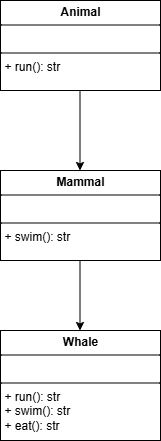

In [15]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/Simple_ATM.drawio.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [1]:
class ATM:
    def __init__(self, name : str, acc_no : str) :
        self.name =  name
        self._acc_no =  acc_no
        self.__balance = 0
        self.__pin = None
    
    @property
    def acc_no(self) -> str:
        return self._acc_no
    
    
    def set_pin(self, value):
        self.__pin = value
        return "Pin is Successfully Set"
    
    def __verify_pin(self, value):
        if self.__pin ==  value:
            return True
        raise ValueError("Failed to Validate Pin")
    
    def get_balance(self) -> int:
        return self.__balance
    
    def deposit(self, pin: int, value: int ) -> str:
        if self.__verify_pin(pin):       
            if value <= 0 :
                raise ValueError("Cannot Enter Value <= 0")
            self.__balance =+ value
            return "Balance deposited Successfully"
        
    def withdraw(self, pin: str,  value: int) -> str:        
        if self.__verify_pin(pin):         
            if value > self.__balance:
                raise ValueError("Cannot Enter value > balance")
            elif value <= 0 :
                raise ValueError("Cannot Enter Value <= 0")
            else:
                self.__balance -= value
            return f"Your Amount {value} has been deducted"
        

In [2]:
obj = ATM("shanmukh","123532123222")
print(obj.acc_no)
print(obj.set_pin(8732))

print(obj.deposit(pin = 8732,value = 1000))
print(obj.get_balance())
print(obj.withdraw(pin = 8732,value = 500))
print(obj.get_balance())



123532123222
Pin is Successfully Set
Balance deposited Successfully
1000
Your Amount 500 has been deducted
500


In [3]:
print(obj.acc_no)


123532123222


In [4]:
obj.acc_no = '444444444444444'

AttributeError: property 'acc_no' of 'ATM' object has no setter

In [ ]:
obj._ATM__balance

500

In [19]:
obj.__pin

AttributeError: 'ATM' object has no attribute '__pin'

In [20]:
obj.pin = 1234

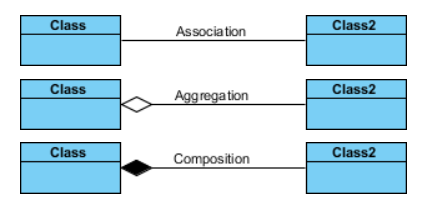

In [21]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/relations.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


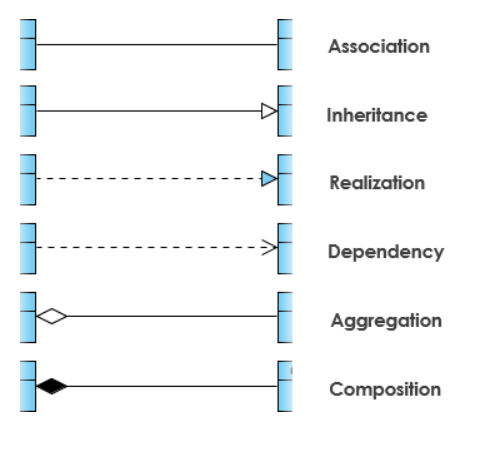

In [38]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/relation_arrows.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


# Class vs Relationships
- Association
- Aggregation
- Composition
- Inheritance
- Realization 
- Dependency

## Association
- Association represents a "uses-a" relationship between two classes where one class uses or interacts with the other.
- Lets Assume two independent classes Doctor and Patient if one is deleted other class object is not effected
- Here we pass the object ref via init which tells it has a strong relationship



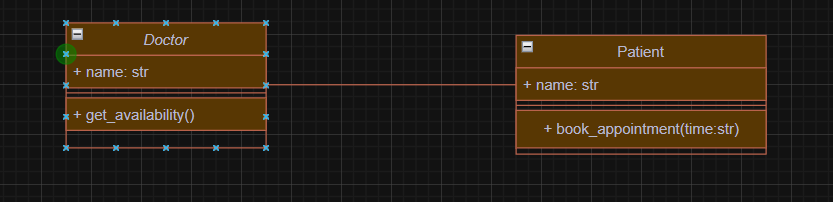

In [47]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/association.drawio.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [45]:
class Doctor:
    def __init__(self, name):
        self.name = name
    
    def get_availability(self):
        return f"Dr. {self.name} is available between 10am to 6pm"
    

class Patient:
    def __init__(self, name,doc: Doctor):
        self.name = name
        self.doc = doc
    
    def book_appointment(self, time: str):
        availability = self.doc.get_availability()
        return f"{self.name} booked an appointment with Dr. {doc.name} at {time}. ({availability})"
    

# Example usage:
doc = Doctor("Smith")
patient = Patient("Alice",doc)
print(patient.book_appointment("11am"))


Alice booked an appointment with Dr. Smith at 11am. (Dr. Smith is available between 10am to 6pm)



* Doctor and Patient are two independent classes.

* A Patient uses a Doctor (in book_appointment) but neither class owns the other.

* The relationship is temporary: a patient can book with a doctor, but both objects exist independently.

* So this is a “uses-a” relationship (Association).

# Aggregation
* Aggregation is a special form of Association.
* All aggregations are associations, but not all associations are aggregations.

## In your Team–Player example:

* If team only uses players → Association.

* If team contains references to players created elsewhere → Aggregation.

* If team creates and owns players → Composition.

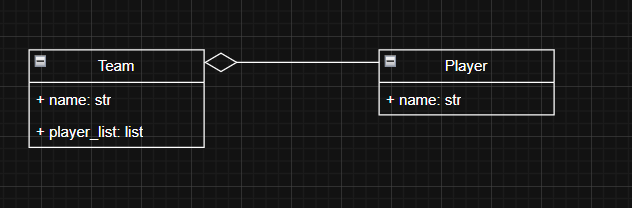

In [24]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/aggregation.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [25]:
class Player:
    def __init__(self, name):
        self.name = name
        
    def __del__(self):
        print(f'Player {self.name} deleted')


class Team:
    def __init__(self, name, players_list):
        self.name = name
        self.players_list = players_list
    
    def __del__(self):
        print(f'Team {self.name} deleted')




# Example
b1 = Player("Evaa")
b2 = Player("Romeoo")

team = Team("SunRisers", [b1, b2])


del team   # Only team is deleted, players still exist


Team SunRisers deleted


# Composition

- A strong “owns-a” relationship where the whole creates and manages the lifetime of parts.
- Example: A Team creates its Players inside. If the team is deleted, players vanish.

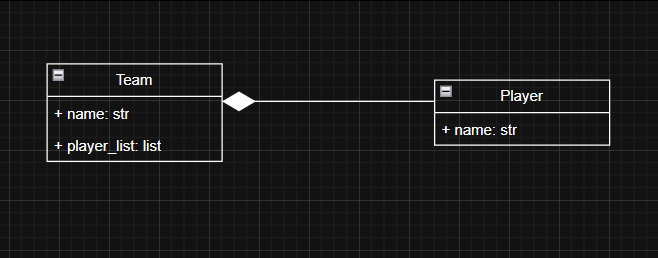

In [26]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/composition.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [27]:
class Player:
    def __init__(self, name):
        self.name = name
        
    def __del__(self):
        print(f'Player {self.name} deleted')


class Team:
    def __init__(self, name, players_names):
        self.name = name
        # Team itself creates players -> Composition (strong ownership)
        self.players_list = [Player(p) for p in players_names]
    
    def __del__(self):
        print(f'Team {self.name} deleted')


# Example
team = Team("SunRisers", ["John", "Doe"])

del team  # Deleting team also deletes players automatically


Team SunRisers deleted
Player Doe deleted
Player John deleted


In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __str__(self):
        return f"({self.x}, {self.y})"

obj1 = Point(2, 4)
obj2 = Point(1, 3)
obj3 = Point('1', '3')
obj4 = Point('2', '4')



print("Addition:", obj1 + obj2)  # Output: (3, 7)
print("Subtraction:", obj1 - obj2)  # Output: (1, 1)
print("Str Addtion:", obj3 + obj4)  # Output: (12, 34)



Addition: (3, 7)
Subtraction: (1, 1)
Str Addtion: (12, 34)


# Inheritance
* Definition: A programming mechanism where a subclass inherits attributes and methods from a superclass.

# 1. Single Inheritance
- A child class inherits from one parent class.

In [28]:
class Animal:
    def speak(self):
        print("This is an animal sound")

class Dog(Animal):  # Single inheritance
    def speak(self):
        print("Bark!")

dog = Dog()
dog.speak()   # Output: Bark!


Bark!


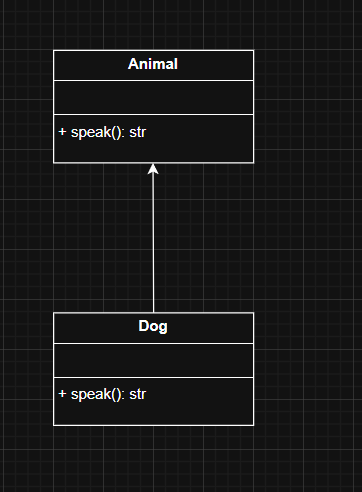

In [29]:

from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/single_inheritance.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


# 2. Multiple Inheritance
- A child class inherits from more than one parent class.

In [30]:
class CanRun:
    def run(self):
        print("Running fast")

class CanBark:
    def bark(self):
        print("Barking loudly")

class Dog(CanRun, CanBark):  # Multiple inheritance
    pass

dog = Dog()
dog.run()   # Output: Running fast
dog.bark()  # Output: Barking loudly


Running fast
Barking loudly


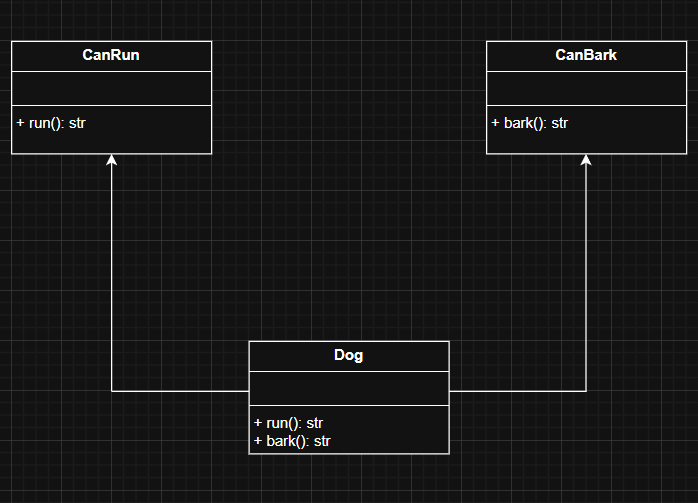

In [31]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/multiple_inheritance.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


# 3. Multilevel Inheritance
- A chain of inheritance (grandparent → parent → child).

In [32]:
class Animal:
    def run(self):
        print("Running")

class Mammal(Animal):  # inherits from Animal
    def swim(self):
        print("Can Swim")

class Whale(Mammal):  # inherits from Mammal
    def eat(self):
        print("Can Eat")

whale = Whale()
whale.run()
whale.swim()
whale.eat()

Running
Can Swim
Can Eat


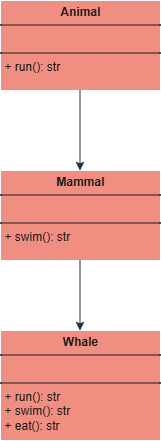

In [33]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/mulit_level.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


# 4. Hierarchical Inheritance
- Multiple child classes inherit from the same parent.

In [34]:
class Animal:
    def speak(self):
        print("Some sound")

class Dog(Animal):
    def speak(self):
        print("Bark!")

class Cat(Animal):
    def speak(self):
        print("Meow!")

dog = Dog()
cat = Cat()
dog.speak()  # Output: Bark!
cat.speak()  # Output: Meow!


Bark!
Meow!


In [1]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/hierarchy.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


Displaying a placeholder image instead:


# Hybrid Inheritance
- A combination of more than one type (e.g., multiple + multilevel).

In [36]:
class Animal:
    def breathe(self):
        print("Breathing")

class Mammal(Animal):
    def feed_milk(self):
        print("Feeding milk")

class CanRun:
    def run(self):
        print("Running fast")

class Dog(Mammal, CanRun):  # Hybrid (multilevel + multiple)
    def bark(self):
        print("Bark!")

dog = Dog()
dog.breathe()    # From Animal
dog.feed_milk()  # From Mammal
dog.run()        # From CanRun
dog.bark()       # From Dog


Breathing
Feeding milk
Running fast
Bark!


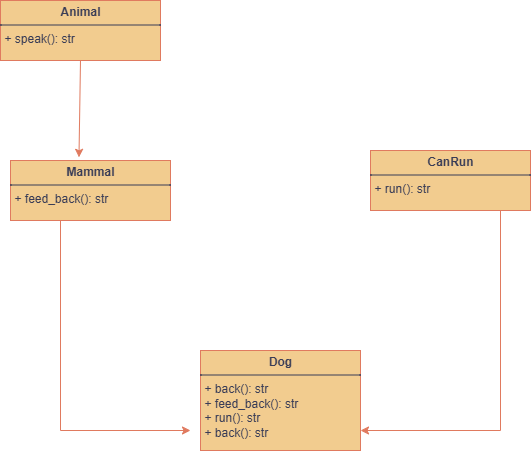

In [ ]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/hybrid.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


# Realization 

- Definition: A relationship between an interface (or abstract class) and a class that implements it.

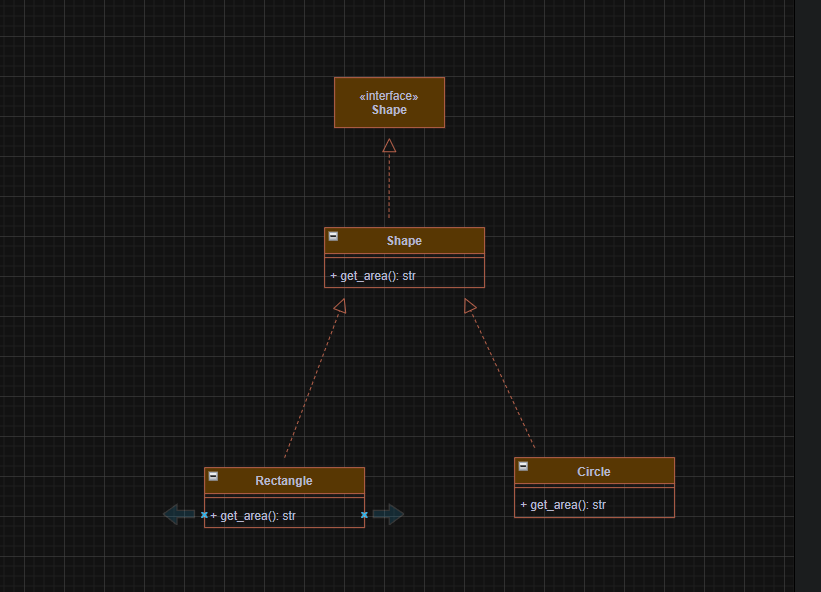

In [40]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/realization.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


# Dependency Injection

* Definition: A “uses” relationship — one class depends on another temporarily.

* If the supplier class changes, the client might need changes too.

* One class needs another just for a method parameter, local variable, or return type.

* No long-term ownership or link.

* Here we pass the object ref via function which is a weak relationship


In [50]:
class Car:
    def start(self):
        print("Car started")

class CarService:
    def service_car(self, car: Car):  # <-- Dependency
        car.start()
        print("Car is serviced")


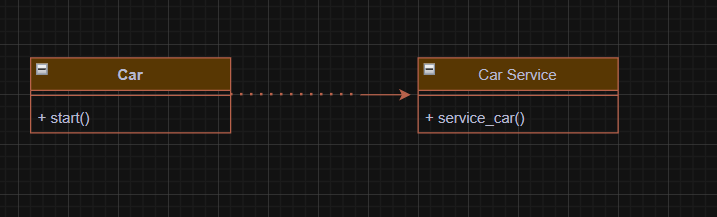

In [51]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/dependency.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


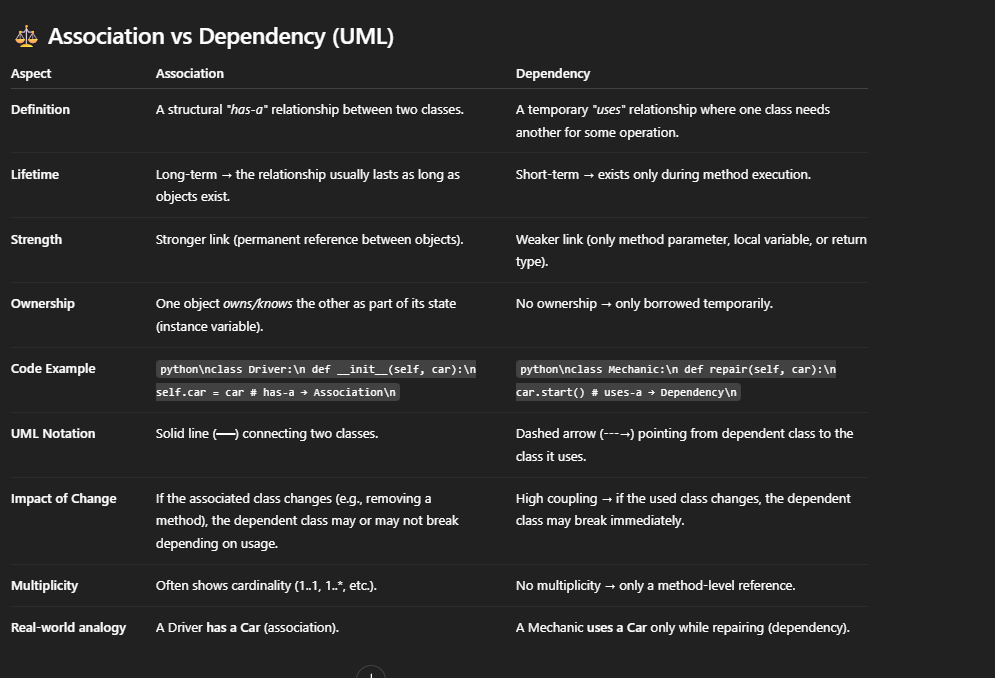

In [2]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/association_vs_dependency.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


### What is an Enum?
- An enum is a special data type that defines a collection of constant values under a single name. Unlike primitive constants or string literals, enums are type-safe, you can’t assign just any value to a variable declared as an enum type.

In [4]:
from enum import Enum

class Coin(Enum):
    PENNY = 1
    NICKEL = 5
    DIME = 10
    QUARTER = 25
    
    def __init__(self, value):
        self.coin_value = value
    
    def get_value(self):
        return self.coin_value

In [5]:
total = Coin.DIME.get_value() 
total


10

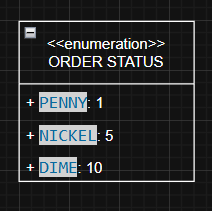

In [6]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='images/enum.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


# static vs class methods
- static methods are used as a utility methods of a class these methods have nothing to do with instance variables and class variables
- class method help in modifying class variables and also create a new constructor

In [1]:
class MathUtils:
    @staticmethod
    def add(x, y):
        return x + y

    @staticmethod
    def is_even(n):
        return n % 2 == 0

# Usage
print(MathUtils.add(5, 3))       # 8
print(MathUtils.is_even(10))     # True


8
True


In [3]:
## Example 1: class variables
class Employee:
    company_name = "Google"

    def __init__(self, name):
        self.name = name

    @classmethod
    def change_company(cls, new_name):
        cls.company_name = new_name

# Usage
e1 = Employee("Alice")
print(e1.company_name)   # Google

Employee.change_company("OpenAI")
print(e1.company_name)   # OpenAI


Google
OpenAI


In [5]:
class Person:
    def __init__(self, name, age, city):
        self.name = name
        self.age = age
        self.city = city

    # Constructor from dictionary
    @classmethod
    def from_dict(cls, data: dict):
        return cls(data["name"], data["age"], data["city"])

    # Constructor from string (comma-separated values)
    @classmethod
    def from_string(cls, data: str):
        name, age, city = data.split(",")
        return cls(name.strip(), int(age.strip()), city.strip())

    def __repr__(self):
        return f"Person(name={self.name}, age={self.age}, city={self.city})"


In [6]:
# Normal constructor
p1 = Person("Alice", 30, "London")

# From dictionary
data_dict = {"name": "Bob", "age": 25, "city": "Paris"}
p2 = Person.from_dict(data_dict)

# From string
data_str = "Charlie, 40, New York"
p3 = Person.from_string(data_str)

print(p1)  # Person(name=Alice, age=30, city=London)
print(p2)  # Person(name=Bob, age=25, city=Paris)
print(p3)  # Person(name=Charlie, age=40, city=New York)


Person(name=Alice, age=30, city=London)
Person(name=Bob, age=25, city=Paris)
Person(name=Charlie, age=40, city=New York)


In [ ]:
class ATM:
    bank_name = "Bandhan ATM"
    def __init__(self,acc_no: str, balance: str, name:str, phone_number:str):
        self._acc_no = acc_no
        self.__balance = balance
        self.name = name
        self.phone_number = phone_number
    
    @property
    def acc_no(self):
        return self._acc_no

    @property
    def balance(self):
        return self.__balance
    
    @classmethod
    def from_dict(cls,data:dict):
        return cls(data['acc_no'],data['balance'],data['name'],data['phone_number'])
    
    @staticmethod
    def validate_500_multiple(amount):
        if amount%500 == 0 and isinstance(amount,int) and amount >=500:
            return True
        return False
        
    def check_balance(self):
        return f'Hi {self.name} your account balance is {self.__balance}'
    
    def withdraw_amount(self, amount:int):
        if ATM.validate_500_multiple(amount) and self.__balance - amount >=0:
            self.__balance -= amount 
    
    def deposit_amount(self, amount):
        if ATM.validate_500_multiple(amount):
            self.__balance += amount
            
if __name__ == "__main__":
    atm_instance = ATM(acc_no='12312R1',balance=1000,name='shanu',phone_number='123123123123') 
    print(atm_instance.check_balance())    
    print(atm_instance.withdraw_amount(500))
    print(atm_instance.check_balance())   
    print(atm_instance.deposit_amount(1500))
    print(atm_instance.check_balance())  
    print(atm_instance.acc_no) 
    print(atm_instance.balance)
    #atm_instance.acc_no = '123123' #fails because of no setter
    #atm_instance.balance =1     #fails because of no setter

Hi shanu your account balance is 1000
None
Hi shanu your account balance is 500
None
Hi shanu your account balance is 2000
12312R1
2000


In [4]:
class Employee:
    def __init__(self, name, emp_id, salary):
        self.name = name
        self.emp_id = emp_id
        self.salary = salary

    def get_details(self):
        return f'{self.name} with ID {self.emp_id} has salary {self.salary}'


class BonusCalculator:
    def __init__(self, emp):
        self.emp = emp

    def get_bonus_information(self):
        # 10% bonus
        revised_salary = self.emp.salary + (self.emp.salary * 0.10)
        return f'Revised CTC after Bonus: {revised_salary}'


class ReportsGenerator:
    def __init__(self, emp):
        self.emp = emp

    def get_reports(self):
        return f'Report generated for {self.emp.name}'


# -------- Usage --------
if __name__ == "__main__":
    emp = Employee("Alice", 101, 50000)

    bonus_calc = BonusCalculator(emp)
    report_gen = ReportsGenerator(emp)

    print(emp.get_details())
    print(bonus_calc.get_bonus_information())
    print(report_gen.get_reports())


Alice with ID 101 has salary 50000
Revised CTC after Bonus: 55000.0
Report generated for Alice


Office PC: 
        CPU: Intel i5
        RAM: 16GB
        Storage: 512GB SSD
        GPU: None
        Cooling: None
        Peripherals: 
         2013063156688
Gaming PC: 
        CPU: AMD Ryzen 9
        RAM: 32GB
        Storage: 1TB SSD
        GPU: NVIDIA RTX 4080
        Cooling: Liquid
        Peripherals: Keyboard, Mouse, Headset
         2013062971280


In [4]:
from PyPDF2 import PdfReader, PdfWriter

reader = PdfReader("AdariShanmukh_Python_Dev.pdf")
writer = PdfWriter()

# Add first two pages only
for i in range(2):
    writer.add_page(reader.pages[i])

with open("Shanmukh_Python_6y.pdf", "wb") as f:
    writer.write(f)


In [2]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
